In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
#load data (change here if you want to experiment)
data = pd.read_csv("adult_train_data.csv")
print(data.columns)
print(data.shape)
data

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'hours_per_week', 'native_country', 'income_more50K'],
      dtype='object')
(30161, 13)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income_more50K
0,30-39,State-gov,<100K,Bachelors,>=10,Never-married,Adm-clerical,Not-in-family,White,Male,35-40,United-States,0
1,50-59,Self-emp-not-inc,<100K,Bachelors,>=10,Married-civ-spouse,Exec-managerial,Husband,White,Male,<35,United-States,0
2,30-39,Private,200K-300K,HS-grad,8--9,Divorced,Handlers-cleaners,Not-in-family,White,Male,35-40,United-States,0
3,50-59,Private,200K-300K,11th,<8,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,35-40,United-States,0
4,20-29,Private,>300K,Bachelors,>=10,Married-civ-spouse,Prof-specialty,Wife,Black,Female,35-40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,20-29,Private,200K-300K,Assoc-acdm,>=10,Married-civ-spouse,Tech-support,Wife,White,Female,35-40,United-States,0
30157,40-49,Private,100K-200K,HS-grad,8--9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,35-40,United-States,1
30158,50-59,Private,100K-200K,HS-grad,8--9,Widowed,Adm-clerical,Unmarried,White,Female,35-40,United-States,0
30159,20-29,Private,200K-300K,HS-grad,8--9,Never-married,Adm-clerical,Own-child,White,Male,<35,United-States,0


In [13]:
X = data[["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "occupation", "race", "sex", "hours_per_week", "native_country"]]
y = data["income_more50K"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(22620, 12)
(7541, 12)
(22620,)
(7541,)


In [14]:
X_train_onehot = pd.get_dummies(X_train,drop_first=False)
X_test_onehot = pd.get_dummies(X_test,drop_first=False)

In [46]:
def train_tree_return_errors(X_train_onehot, y_train, X_test_onehot, y_test, max_depth = 7):
    clf = tree.DecisionTreeClassifier(max_depth = max_depth, random_state = 10)
    clf = clf.fit(X_train_onehot, y_train)
    
    #make predictions on training set
    y_train_pred = clf.predict(X_train_onehot)
    
    #make predictions on test set
    y_test_pred = clf.predict(X_test_onehot)
     
    error_train = 1 - accuracy_score(np.array(y_train), y_train_pred)
    error_test = 1 - accuracy_score(np.array(y_test), y_test_pred)

    return [error_train, error_test]

In [47]:
#tree with full depth
error_train, error_test = train_tree_return_errors(X_train_onehot, y_train, X_test_onehot, y_test)
approximation_error = error_test - error_train
print("Error on train set: ", error_train)
print("Error on test set: ", error_test)
print("Approximation error: ", approximation_error) 

Error on train set:  0.1682139699381079
Error on test set:  0.1778278742872298
Approximation error:  0.009613904349121905


In [23]:
#tree with different depths
data_plot = pd.DataFrame()
for depth in range(1, 21):
    error_train, error_test = train_tree_return_errors(X_train_onehot, y_train, X_test_onehot, y_test, max_depth = depth)
    approximation_error = error_test - error_train
    data_plot = pd.concat([data_plot, pd.DataFrame([[depth, error_train, error_test, approximation_error]])], ignore_index=True)
data_plot = data_plot.rename(columns = {0: "depth", 1: "error_train", 2: "error_test", 3: "approximation_error"})

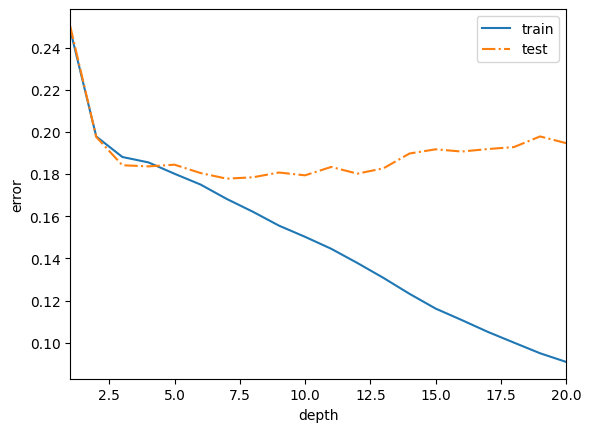

In [24]:
plt.plot(data_plot["depth"], data_plot["error_train"], label ='train')
plt.plot(data_plot["depth"], data_plot["error_test"], '-.', label ='test')
plt.xlabel("depth")
plt.ylabel("error")
plt.xlim(1, 20)
plt.legend()